In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sp
import os
print(os.listdir("/content/drive/MyDrive/Pneumonia_Detection"))

['stage_2_detailed_class_info.csv', 'GCP Credits Request Link - RSNA.txt', 'stage_2_sample_submission.csv', 'stage_2_train_labels.csv', 'kaggle.json', 'stage_2_test_images', 'stage_2_train_images', '.ipynb_checkpoints', 'PD_Sample', 'Pneumonia Detection.ipynb', 'detect pneumonia.ipynb']


In [3]:
!pip install pydicom


     |████████████████████████████████| 1.9 MB 8.1 MB/s 


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pydicom


In [6]:
class_info = pd.read_csv('/content/drive/MyDrive/Pneumonia_Detection/stage_2_detailed_class_info.csv')
tr_labels = pd.read_csv('/content/drive/MyDrive/Pneumonia_Detection/stage_2_train_labels.csv')

In [7]:
print(len(class_info))
class_info.head()

30227


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [8]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [9]:
# Acccessing rows by index in pandas
class_info.loc[2][0]

'00322d4d-1c29-4943-afc9-b6754be640eb'

In [10]:
class_info['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
      dtype=object)

In [14]:
tr_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [15]:
images_list = os.listdir("/content/drive/MyDrive/Pneumonia_Detection/stage_2_train_images")
test_image = os.listdir("/content/drive/MyDrive/Pneumonia_Detection/stage_2_test_images")


In [16]:
print(images_list[1][:-4])

f68d03d0-4afd-490f-8132-06e2103b690e


In [17]:
ty=[]

In [18]:
c=class_info[class_info['patientId']==images_list[1][:-4]]

In [19]:
c

,patientId,class
27788,f68d03d0-4afd-490f-8132-06e2103b690e,Normal


In [20]:
ty.append(c['class'].unique()[0])

In [21]:
ty

['Normal']

In [22]:
print(len(images_list))
print(len(test_image))

26684
3000


In [23]:
def show(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image,cmap='gray')
    plt.show()

In [24]:
path="/content/drive/MyDrive/Pneumonia_Detection/stage_2_train_images/"

In [25]:
dcm_data = pydicom.read_file(path+images_list[0])

In [26]:
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.6925.1517874328.649395
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6925.1517874328.649395
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [27]:
img = dcm_data.pixel_array

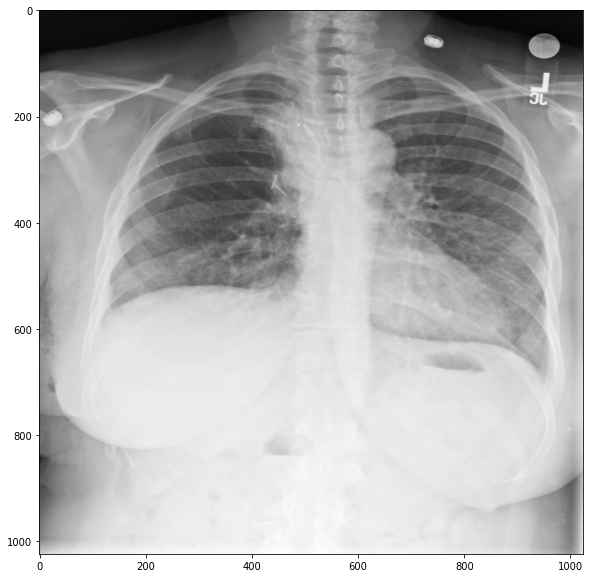

In [28]:
show(img)

In [29]:
l= list(dcm_data.elements())

In [30]:
dcm_data.keys()

dict_keys([(0008, 0005), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0030), (0008, 0050), (0008, 0060), (0008, 0064), (0008, 0090), (0008, 103e), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0010, 1010), (0018, 0015), (0018, 5101), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0013), (0020, 0020), (0028, 0002), (0028, 0004), (0028, 0010), (0028, 0011), (0028, 0030), (0028, 0100), (0028, 0101), (0028, 0102), (0028, 0103), (0028, 2110), (0028, 2114), (7fe0, 0010)])

In [31]:
dcm_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.6925.1517874328.649395
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6925.1517874328.649395
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [32]:
dcm_data[0x28,0x10]

(0028, 0010) Rows                                US: 1024

In [33]:
dcm_data[0x10,0x10]

(0010, 0010) Patient's Name                      PN: 'f69dd7b7-4787-4e31-adb2-2dd626ee8da8'

In [34]:
# if we do nat exactly remember the keywords the following way can be conveniently used to first get
# the keys first and then using that key to access corresponding values.
dcm_data.dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [35]:
dcm_data.PatientID

'f69dd7b7-4787-4e31-adb2-2dd626ee8da8'

In [36]:
dcm_data.PatientSex

'F'

In [37]:
sample_sub = pd.read_csv("/content/drive/MyDrive/Pneumonia_Detection/stage_2_sample_submission.csv")
sample_sub.head(10)

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100
5,0015597f-2d69-4bc7-b642-5b5e01534676,0.5 0 0 100 100
6,001b0c51-c7b3-45c1-9c17-fa7594cab96e,0.5 0 0 100 100
7,0022bb50-bf6c-4185-843e-403a9cc1ea80,0.5 0 0 100 100
8,00271e8e-aea8-4f0a-8a34-3025831f1079,0.5 0 0 100 100
9,0028450f-5b8e-4695-9416-8340b6f686b0,0.5 0 0 100 100


In [38]:
l1 = list(class_info['patientId'])


In [39]:
l1[0:10]

['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
 '00322d4d-1c29-4943-afc9-b6754be640eb',
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5',
 '00436515-870c-4b36-a041-de91049b9ab4',
 '00436515-870c-4b36-a041-de91049b9ab4',
 '00569f44-917d-4c86-a842-81832af98c30',
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970',
 '00704310-78a8-4b38-8475-49f4573b2dbb',
 '00704310-78a8-4b38-8475-49f4573b2dbb']

In [40]:
not_labeled =[]

for i in range(0,1000):
    if test_image[i][:-4] not in l1:
        not_labeled.append(test_image[i])

In [41]:
not_labeled[0:10]

['260a7b23-08ed-451d-bd0a-ecbffc7c3d30.dcm',
 '262aefb6-740e-4af6-9ed1-e2f0a11a5aa6.dcm',
 '268c4efc-36b5-467d-a63c-b334e482fa05.dcm',
 '2616499c-8097-43cd-8864-575ba5d4d932.dcm',
 '268116a6-2304-4316-b5b3-3073fc5467b1.dcm',
 '2699ba79-7383-46e2-bf24-53b6bda87dfc.dcm',
 '251ecdcd-70e7-4aa2-91f6-208d61a6b41e.dcm',
 '26b59bc8-dd04-4093-876f-fb0667d3b43a.dcm',
 '2566c9fb-c0e1-4db3-a61a-88ee9e4ba7dd.dcm',
 '25d088e7-8415-4028-ab4e-bf20f27a81d4.dcm']

In [42]:
# all image of test_images are not labeled 
len(not_labeled)

1000

In [43]:
labeled =[]

for i in range(0,26684):
    if images_list[i][:-4] not in l1:
        labeled.append(images_list[i])

In [44]:
labeled

[]

In [45]:
len(labeled)
# so all traing data is lebelled

0

In [46]:
len(set(l1))

26684

In [47]:
s =test_image[10][:-4]

In [48]:
s in l1

False

In [49]:
s

'2698f88a-e222-48fe-9488-99a08e517b7b'

In [50]:
pid = sample_sub['patientId']
string = sample_sub['PredictionString']



In [51]:
my_submission = pd.DataFrame({'patientId': pid, 'PredictionString': string})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [52]:
my_submission.head()

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [53]:
import csv
import random

In [54]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join('/content/drive/MyDrive/Pneumonia_Detection/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]


In [55]:
#pneumonia_locations

In [56]:
img_with_pneumonia={}
for index,row in tr_labels.iterrows():
    filename=row['patientId']
    pneumonia= row['Target']
    if pneumonia==1:
        if filename in img_with_pneumonia:
            img_with_pneumonia[filename].append([int(row['x']),int(row['y']),int(row['height']),int(row['width'])])
        else:
            img_with_pneumonia[filename]=[[int(row['x']),int(row['y']),int(row['height']),int(row['width'])]]
    

In [57]:
img2= img

In [58]:
img2

array([[ 13,  13,  13, ...,  13,  13,  13],
       [ 15,  15,  15, ...,  14,  14,  15],
       [ 15,  15,  15, ...,  15,  15,  15],
       ...,
       [179, 180, 183, ..., 210, 214, 216],
       [183, 184, 187, ..., 210, 214, 216],
       [187, 189, 191, ..., 210, 215, 217]], dtype=uint8)

In [59]:
print(img2.shape)
img2 = np.expand_dims(img2,-1)

(1024, 1024)


In [60]:
img2.shape

(1024, 1024, 1)

In [61]:
len(img2[0])

1024

In [62]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [63]:
len(images_list)%1500

1184

In [64]:
train_x=[]
train_y=[]
def makeDataset():
    for i in range(len(images_list)%1500):
        d=pydicom.read_file(path+images_list[i])
        c=class_info[class_info['patientId']==images_list[i][:-4]]
        train_y.append(c['class'].unique()[0])
        train_x.append(d.pixel_array)
makeDataset()

In [65]:
#print(train_x.shape)
#print(train_y.shape)
print(len(train_x))
print(len(train_y))

1184
1184


In [66]:
#function to convert string label to integer value
def label(s):
    if s=='Normal':
        return 0
    if s=='No Lung Opacity / Not Normal':
        return 1
    if s=='Lung Opacity':
        return 2

In [67]:
label

<function __main__.label>

In [68]:
train_y[0:10]

['No Lung Opacity / Not Normal',
 'Normal',
 'Normal',
 'No Lung Opacity / Not Normal',
 'No Lung Opacity / Not Normal',
 'No Lung Opacity / Not Normal',
 'No Lung Opacity / Not Normal',
 'No Lung Opacity / Not Normal',
 'Lung Opacity',
 'Lung Opacity']

In [69]:
train_y = list(map(label,train_y))
#print(train_y.shape)
train_y= np.stack(train_y)
print(train_y.shape)
#print(train_x.shape)
train_x = np.stack(train_x)

(1184,)


In [70]:
train_x.shape

(1184, 1024, 1024)

In [71]:
train_y.shape

(1184,)

In [72]:
# converting train_y to one hot
train_y = to_categorical(train_y)
# reshaping train_x to standard form
train_x=train_x.reshape(-1,1024,1024,1)

In [73]:
train_x.shape

(1184, 1024, 1024, 1)

In [74]:
# Normalizing the pixel value
train_x = train_x.astype('float32')
train_x = train_x / 255.

In [75]:
print(train_x.shape)
print(train_y.shape)

(1184, 1024, 1024, 1)
(1184, 3)


In [76]:
#del train_x
#del train_y

In [77]:
train_y[0]

array([0., 1., 0.], dtype=float32)

In [78]:
#The image have 1024X1024 and only one channel
img = pydicom.read_file(path+images_list[1])
img=img.pixel_array
img.shape

(1024, 1024)

In [79]:
batch_size = 16
epochs = 15
num_classes = 3

In [80]:
model= Sequential()
# here input shape is (1024,1024) because the image is of size 1024X1024 and have only one channel
# here 32 is number of filters of kernel size (3,3)
# generally number of filters are increased and kernel size decreased but here is is constant

model.add(Conv2D(32,kernel_size=(7,7),activation='linear',input_shape=(1024,1024,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(7,7),padding='same'))
model.add(Conv2D(64,kernel_size=(7,7),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(7,7),padding='same'))
model.add(Conv2D(128,kernel_size=(7,7),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(7,7),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes,activation='softmax'))

In [81]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 1024, 32)    1600      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024, 1024, 32)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      100416    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       4

In [83]:
model_train = model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/15
74/74 [==============================] - 63s 243ms/step - loss: 1.0077 - accuracy: 0.5151
Epoch 2/15
74/74 [==============================] - 18s 245ms/step - loss: 0.9485 - accuracy: 0.5518
Epoch 3/15
74/74 [==============================] - 18s 246ms/step - loss: 0.8867 - accuracy: 0.5669
Epoch 4/15
74/74 [==============================] - 18s 247ms/step - loss: 0.8257 - accuracy: 0.6200
Epoch 5/15
74/74 [==============================] - 18s 248ms/step - loss: 0.7546 - accuracy: 0.6593
Epoch 6/15
74/74 [==============================] - 19s 250ms/step - loss: 0.7123 - accuracy: 0.6424
Epoch 7/15
74/74 [==============================] - 19s 252ms/step - loss: 0.7456 - accuracy: 0.6430
Epoch 8/15
74/74 [==============================] - 19s 253ms/step - loss: 0.6522 - accuracy: 0.7348
Epoch 9/15
74/74 [==============================] - 19s 253ms/step - loss: 0.5850 - accuracy: 0.7571
Epoch 10/15
74/74 [==============================] - 19s 254ms/step - loss: 0.6243 - accura

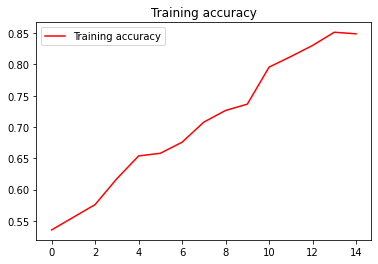

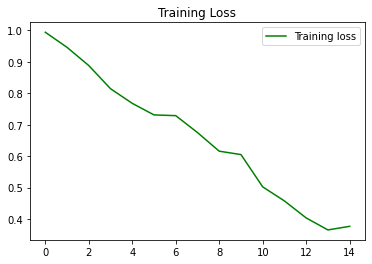

In [85]:
# Model Training Results
accuracy = model_train.history['accuracy']
loss = model_train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

**Now checking Model performance **

In [86]:
# check performance on train_data
test_eval = model.evaluate(train_x, train_y, verbose=0)

In [87]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3257583975791931
Test accuracy: 0.8564189076423645


In [88]:
# check individual
print("Predicted label of the image",np.argmax(np.round(model.predict(np.expand_dims(train_x[3],axis=0)))))
print("Actual label of the image ",np.argmax(train_y[3]))

Predicted label of the image 1
Actual label of the image  1


In [89]:

def check(i):
    dcm_img = pydicom.read_file(path+class_info.loc[i][0]+".dcm")
    img=dcm_img.pixel_array
    img2=img.reshape(1024,1024,1)
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap='gray')
    p=np.argmax(np.round(model.predict(np.expand_dims(img2,axis=0))))
    plt.title("Predicted {} ,Actual {}".format(p,label(class_info.loc[i][1])))
    plt.show()

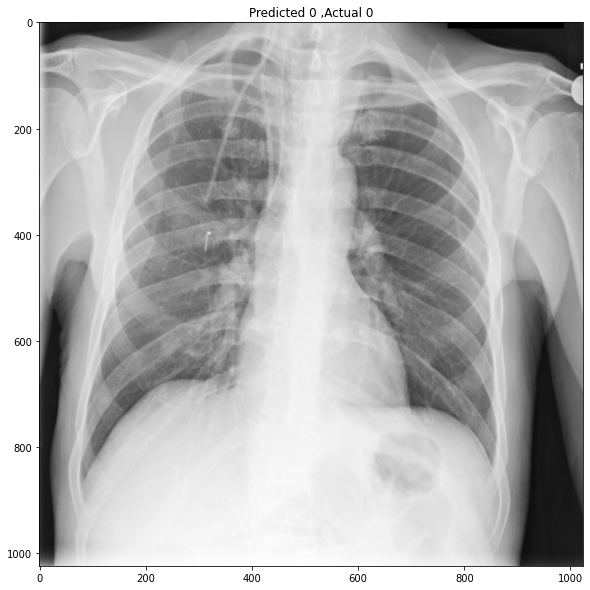

In [90]:
check(25000)